<a href="https://colab.research.google.com/github/pSN0W/horse-vs-humans/blob/main/Horse_v_Human.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip \
    -O /tmp/horse-or-human.zip

--2021-07-13 06:26:12--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.2.128, 142.250.141.128, 74.125.137.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.2.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149574867 (143M) [application/zip]
Saving to: ‘/tmp/horse-or-human.zip’

/tmp/horse-or-human 100%[===================>] 142.65M   137MB/s    in 1.0s    

2021-07-13 06:26:13 (137 MB/s) - ‘/tmp/horse-or-human.zip’ saved [149574867/149574867]



In [ ]:
import os
import zipfile

In [ ]:
local_zip = '/tmp/horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip,'r')
zip_ref.extractall('/tmp/horse-or-human')
zip_ref.close()

In [ ]:
# Directory with our training images of horse
train_horse_dir = os.path.join('/tmp/horse-or-human/horses')

# Directory with our training images of human
train_human_dir = os.path.join('/tmp/horse-or-human/humans')

In [ ]:
horse_name = os.listdir(train_horse_dir)
human_name = os.listdir(train_human_dir)
print("Name of few horses : ",horse_name[:10])
print("Name of few humans : ",human_name[:10])

Name of few horses :  ['horse47-7.png', 'horse01-4.png', 'horse41-1.png', 'horse01-9.png', 'horse46-3.png', 'horse37-4.png', 'horse40-7.png', 'horse39-4.png', 'horse39-2.png', 'horse28-6.png']
Name of few humans :  ['human10-18.png', 'human11-21.png', 'human17-19.png', 'human16-19.png', 'human04-25.png', 'human15-13.png', 'human03-15.png', 'human01-22.png', 'human15-19.png', 'human04-29.png']


In [ ]:
print("Total number of horses in the training is ",len(horse_name))
print("Total number of humans in the training is ",len(human_name))

Total number of horses in the training is  500
Total number of humans in the training is  527


Plot images of 8 human and 8 horses

In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

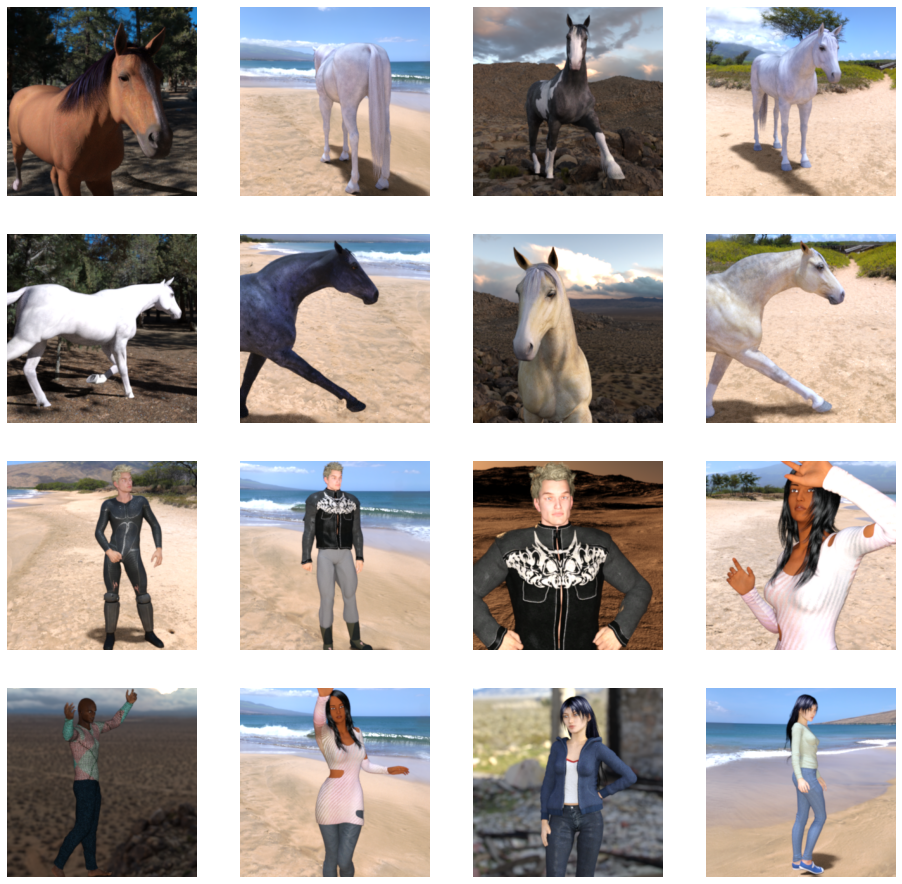

In [ ]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_horse_pix = [os.path.join(train_horse_dir, fname) 
                for fname in horse_name[pic_index-8:pic_index]]
next_human_pix = [os.path.join(train_human_dir, fname) 
                for fname in human_name[pic_index-8:pic_index]]

for i, img_path in enumerate(next_horse_pix+next_human_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()


In [ ]:
import tensorflow as tf

In [ ]:
model = tf.keras.models.Sequential([
                            tf.keras.layers.Conv2D(16,(3,3),activation='relu',input_shape=(300,300,3)),
                            tf.keras.layers.MaxPooling2D(2,2),
                            tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
                            tf.keras.layers.MaxPooling2D(2,2),
                            tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
                            tf.keras.layers.MaxPooling2D(2,2),
                            tf.keras.layers.Flatten(),
                            tf.keras.layers.Dense(512,activation='relu'),
                            tf.keras.layers.Dense(64,activation='relu'),
                            tf.keras.layers.Dense(1,activation='sigmoid')
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 298, 298, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 149, 149, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 147, 147, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 71, 71, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 35, 35, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 78400)             0

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_data_gen = ImageDataGenerator(rescale=1/255.0)
train_generator = train_data_gen.flow_from_directory(
    '/tmp/horse-or-human/',
    target_size = (300,300),
    batch_size = 128,
    class_mode = 'binary'
)

Found 1027 images belonging to 2 classes.


In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch = 8,
    epochs = 20,
    verbose = 1,
)

Epoch 1/20
8/8 [==============================] - 6s 741ms/step - loss: 0.3317 - accuracy: 0.8632
Epoch 2/20
8/8 [==============================] - 6s 829ms/step - loss: 0.1572 - accuracy: 0.9533
Epoch 3/20
8/8 [==============================] - 6s 701ms/step - loss: 0.1025 - accuracy: 0.9588
Epoch 4/20
8/8 [==============================] - 7s 820ms/step - loss: 0.0535 - accuracy: 0.9805
Epoch 5/20
8/8 [==============================] - 7s 831ms/step - loss: 0.0287 - accuracy: 0.9912
Epoch 6/20
8/8 [==============================] - 6s 701ms/step - loss: 0.0190 - accuracy: 0.9933
Epoch 7/20
8/8 [==============================] - 6s 707ms/step - loss: 0.0119 - accuracy: 0.9967
Epoch 8/20
8/8 [==============================] - 6s 691ms/step - loss: 0.0049 - accuracy: 0.9989
Epoch 9/20
8/8 [==============================] - 6s 692ms/step - loss: 0.0060 - accuracy: 1.0000
Epoch 10/20
8/8 [==============================] - 6s 695ms/step - loss: 0.0023 - accuracy: 1.0000
Epoch 11/20
8/8 [==

Predicting on images using the model

Saving download (1).jpg to download (1) (1).jpg
Saving download (2).jpg to download (2) (1).jpg
Saving download (3).jpg to download (3) (2).jpg
Saving download (4).jpg to download (4) (2).jpg
Saving download (5).jpg to download (5) (2).jpg
Saving download (6).jpg to download (6) (1).jpg
Saving download (7).jpg to download (7) (1).jpg
Saving download.jpg to download (8).jpg
[1.]


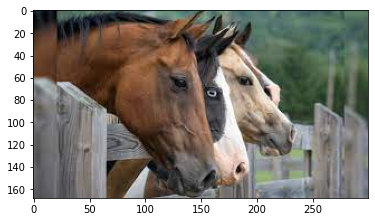

download (1).jpg is a human! 
[0.]


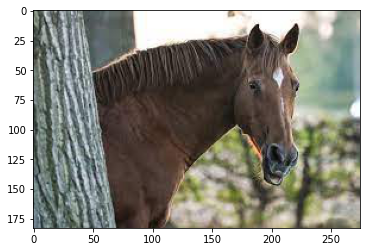

download (2).jpg is a horse! 
[0.]


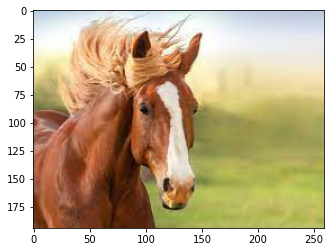

download (3).jpg is a horse! 
[2.9194807e-33]


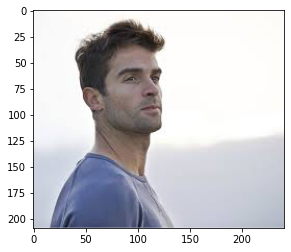

download (4).jpg is a horse! 
[1.]


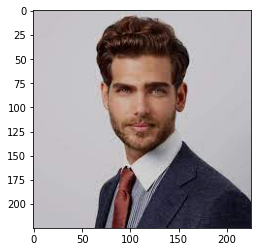

download (5).jpg is a human! 
[1.]


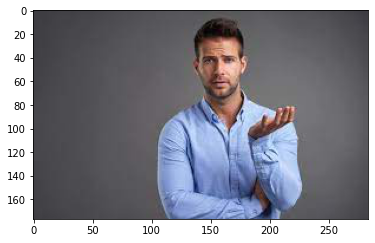

download (6).jpg is a human! 
[0.]


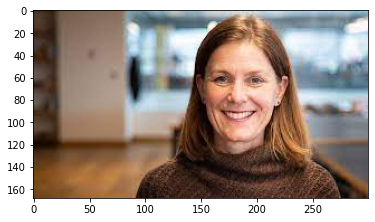

download (7).jpg is a horse! 
[0.]


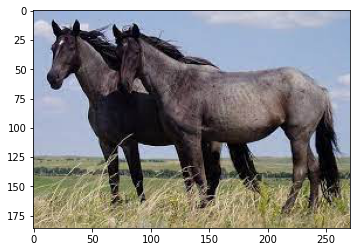

download.jpg is a horse! 


In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()
for fn in uploaded.keys():
  path = '/content/'+fn
  img = image.load_img(path,target_size=(300,300))
  x = image.img_to_array(img)
  x = x/255.0
  images = x.reshape(1,300,300,3)
  classes = model.predict(images)
  print(classes[0])
  import matplotlib.pyplot as plt
  import matplotlib.image as mpimg
  img = mpimg.imread(path)
  imgplot = plt.imshow(img)
  plt.show()
  if classes[0]>0.5 :
    print(fn + " is a human! ")
  else:
    print(fn+ " is a horse! ")